# Inauguralproject - Kerem Yapici & Niels Lund-Andersen

In [1]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.stats import beta
from inaugural import *
par = SimpleNamespace(y = 1, p = 0.2, theta = -2, g = 0.95, x = 0.6, a = 2, b = 7, N = 100000)

## Question 1

### i)

In order to solve the first subquestion of Question 1, we've defined numerous functions in the .py-file that gives us the utility, premium, and the expected value of the valueequation. These functions are the means to solving the optimal coverage amounts. The following function uses .minimize_scalar capabilities to solve the negated minimum of the expected value.

In [10]:
par = SimpleNamespace(y = 1, p = 0.2, theta = -2, g = 0.95, x = 0.6, a = 2, b = 7, N = 100000)
def optimal_q(x,par):
    from scipy import optimize
    obj = lambda q: -exp_value(x,q,par)
    solution = optimize.minimize_scalar(obj,bounds=(0,0.9),method='bounded')
    q = solution.x
    return q

### ii)/iii)

Now, we want to create a grid of 100 x-values that runs from 0.01 to 0.9. For reasons of efficiency, we've created the grid inside the for-loop that solves the 100 x-values that are given in the grid. Additionally we've added the values into the two empty lists, that is later used to graph it.

In [11]:
qres = []
xres = []
for x in np.linspace(0.01,0.9,100):
    res = np.array(optimal_q(x,par))
    x = x
    qres.append(res)
    xres.append(x)

### iv)

Now we've come to the question of making a plot that shows the corrolation of the x-values and the q-values. This is done using the 'matplotlib.pyplot' program.

Text(0.5, 1.0, 'Correlation between x-values and q-values')

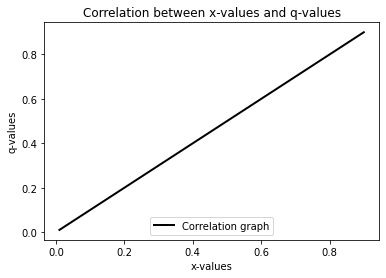

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xres,qres, lw=2,color='black',label='Correlation graph')
ax.set_xlabel('x-values')
ax.set_ylabel('q-values')
ax.legend(loc='lower center',frameon=True)
ax.set_title('Correlation between x-values and q-values')

As you can see there is perfekt corrolation, but there is a slight smaller value of the q's over the x's. This however is neglitable since the difference is statisticly insignificant. 

## Question 2

## i)

Here we begin this question by generating the grid for which the q-values will run. This is done using the linspace-function. 

In [13]:
q_grid = np.linspace(0.01, 0.6, 100)

### ii)

We start by finding the optimal premiums given the function that defines the acceptable contracts. This is done using the .root optimizer and saving the results as earlier. 

In [14]:
premium_guess = [0]
premium_results = [] #Empty list to save results
qvalue = []
old_premium = []

for q in q_grid:
    obj_premium = lambda premium: -acceptable(q, premium[0])
    res = optimize.root(obj_premium, premium_guess, method='broyden1')
    premium_results.append(res.x[0])
    qvalue.append(q)
    old_premium.append(0.2*q)

When we have these results, we plot both the premiums that that are acceptable, and the premiums given by the function of premiums. The shaded area covers the difference. 

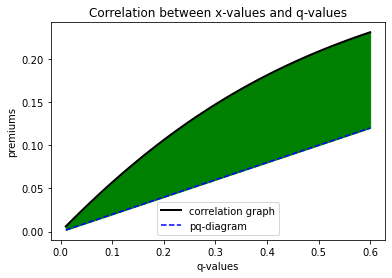

In [15]:
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2.plot(qvalue,premium_results, lw=2,color='black',label='correlation graph')
ax2.plot(qvalue,old_premium, ls='--', color='blue',label='pq-diagram')
ax2.set_xlabel('q-values')
ax2.set_ylabel('premiums')
ax2.legend(loc='lower center',frameon=True)
ax2.set_title('Correlation between x-values and q-values')
plt.fill_between(qvalue,premium_results,old_premium, color='green')

The result is that we now has the green shaded area that defines feasable premiums given the coverage amount.

## Question 3

### i)/ii)

In this question we are combining the two subquestions since it makes the function more efficient. This can be seen as below.

In [8]:
def average_eq(gamma,premium,par):
    x = beta.rvs(par.a, par.b, size=par.N)
    z1 = par.y-(1-gamma)*x-premium
    z2 = par.y-premium
    return np.mean(par.p*utility(z1,par)+(1-par.p)*utility(z2,par))


print('First test is =', "%.2f" % average_eq(0.9,0.2,par,))
print('Second test is =', "%.2f" % average_eq(0.45,0.1,par))

First test is = -1.26
Second test is = -1.15


Here we get the result that a gamma-value (or coverage-ratio) of 0.45 and a pi (premium) of 0.1 given the two options.

## Question 4

### i)

In this question we are looking to find the profit maximizing premium. This is done by using the .root optimizier. 

In [9]:
premium_guess = [0] 
obj = lambda premium: difference(premium[0],par)
res = optimize.root(obj,premium_guess,method='broyden1')
premium_optimum = res.x[0]
print("The profit maximizing premium is", "%.2f" % premium_optimum)

The profit maximizing premium is 0.25
